
# **Pharmacy Dispensing Analysis at Mawenzi Regional Referral Hospital**  

## **1.Project Overview:**  
This project analyzes **pharmacy dispensing trends** for **Emergency Department** and **Outpatient Department(OPD)** in **2024** at **Mawenzi Regional Referral Hospital**, using data extracted from its **Electronic Health Record (EHR) system, Afya EHMS**. The dataset provides insights into **medication utilization, patient demographics, and dispensing patterns** over time. By examining these trends, we aim to **optimize inventory management, enhance patient care, and identify key prescribing behaviors**.  

### **Dataset Overview & Column Definitions**  
The dataset consists of **123,944 records**, capturing details of dispensed medications and patient transactions. Key columns include:  

- **Patient_ID** – A unique identifier for each patient.  
- **Age** – Patient’s age in years.  
- **Gender** – Biological sex of the patient (Male/Female).  
- **Date_Dispensed** – The date the medication was issued.  
- **Clinic_Type** – The hospital department where the medication was dispensed (e.g., Emergency, Outpatient Clinic).  
- **Item_Name** – The name of the **dispensed medication or non-drug medical supply**.  
- **Quantity_Dispensed** – The total units of the item given to the patient.  
- **Sponsor** – **Payment type**, distinguishing between:  
  - **Cash** – Patients who pay out-of-pocket.  
  - **NHIF** – Patients covered by **National Health Insurance Fund**.  
- **Dosage_Amount, Route, and Frequency** – Details of how the medication is administered.  
- **Subtotal** – The total cost of the dispensed item(s).  

### **Objectives of the Analysis**  
✅ **Identify top dispensed medications** to guide procurement and stocking.  
✅ **Analyze patient demographics** (age, gender, clinic type) to understand healthcare demand.  
✅ **Evaluate dispensing trends over time** to detect seasonal variations.  
✅ **Investigate non-drug items** (e.g., syringes, IV fluids) and their utilization patterns.  
✅ **Provide actionable recommendations** for improved **inventory, resource allocation, and patient care**.  
  

### **Table of Contents**  
1. **[Project Overview](#Project-Overview)**  
2. **[Data Loading and Initial Exploration](#data-loading-and-initial-exploration)**  
3. **[Data Preprocessing](#data-preprocessing)**  
4. **[Exploratory Data Analysis (EDA)](#exploratory-data-analysis)**  
5. **[Key Findings from EDA](#key-findings-from-eda)**  
6. **[Actionable Recommendations](#actionable-recommendations)**  


## 2. Data Loading and Initial Exploration

In [340]:
# Importing necessary libraries for data manipulation, visualization, and modeling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [342]:
#Loading the dataset and displaying the first 5 rows to understand the data structure

df=pd.read_excel(r"C:\Users\HP\Documents\python tt\MAWENZI HOSPITAL DATA\Dispensed_Medications_Report_2024.xlsx")
df.head()

,Patient_ID,Sponsor,Age,Gender,Clinic_Type,Item_Name,Price,Quantity,Exempted,Date_dispensed,Subtotal,Dosage_Amount,Route,Frequency
0,131958,CASH,1.000000,Female,Emergency,Amoxycillin + Clavulanic Acid oral suspension...,7500,1,0,2024-02-16 10:55:28,7500,5mg,ORAL,OD
1,141932,CASH,60.000000,Male,OPD Clinic,Pregabalin Solid oral dosage form: 75mg,400,30,0,2024-02-24 23:06:26,12000,Injection:5mg/ml in 100mlmg,IV,BD
2,113694,CASH,0.333333,Male,Emergency,Syringe Disposable with needle 5 cc,500,5,0,2024-04-30 06:25:23,2500,100ml,ORAL,BD
3,129879,CASH,67.000000,Male,Emergency,Sodium Chloride + Dextrose IV Solution (DNS) :...,2000,8,100,2024-01-20 03:04:57,16000,-,NaN,NaN
4,120268,CASH,1.000000,Male,Emergency,Sodium Chloride + Dextrose IV Solution (DNS) :...,2000,2,0,2024-05-17 21:56:26,4000,150mg,ORAL,OD


In [343]:
df.shape

(123944, 14)

In [344]:
#Let's display the basic info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123944 entries, 0 to 123943
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Patient_ID      123944 non-null  int64         
 1   Sponsor         123944 non-null  object        
 2   Age             123944 non-null  float64       
 3   Gender          123944 non-null  object        
 4   Clinic_Type     123944 non-null  object        
 5   Item_Name       123944 non-null  object        
 6   Price           123944 non-null  int64         
 7   Quantity        123944 non-null  int64         
 8   Exempted        123944 non-null  int64         
 9   Date_dispensed  123944 non-null  datetime64[ns]
 10  Subtotal        123944 non-null  int64         
 11  Dosage_Amount   116020 non-null  object        
 12  Route           80369 non-null   object        
 13  Frequency       80338 non-null   object        
dtypes: datetime64[ns](1), float64(1), in

In [345]:
# Let's Check for missing values
df.isnull().sum()

Patient_ID            0
Sponsor               0
Age                   0
Gender                0
Clinic_Type           0
Item_Name             0
Price                 0
Quantity              0
Exempted              0
Date_dispensed        0
Subtotal              0
Dosage_Amount      7924
Route             43575
Frequency         43606
dtype: int64

In [346]:
#let's check for duplicates

df.duplicated().sum()

23


### **Initial Observations**

- The dataset contains **123,944 records** and **14 columns**.
- The **Age** column should be an **integer** data type instead of a float.
- The **Exempted** column is unnecessary for this analysis and will be **dropped**.
- Columns like **Dosage_Amount, Route, and Frequency** have **missing values** that need handling.
- **Item_Name** contains **mixed casing**, which requires **standardization**.
- Other categorical columns (**Sponsor, Clinic_Type, etc.**) might need **cleaning and normalization**.
- The dataset contains duplicate values.


## **3.Data Preprocessing**

In [349]:
#Droping the duplicate values and just displaying the first two rows
df.drop_duplicates().head(2)

,Patient_ID,Sponsor,Age,Gender,Clinic_Type,Item_Name,Price,Quantity,Exempted,Date_dispensed,Subtotal,Dosage_Amount,Route,Frequency
0,131958,CASH,1.0,Female,Emergency,Amoxycillin + Clavulanic Acid oral suspension...,7500,1,0,2024-02-16 10:55:28,7500,5mg,ORAL,OD
1,141932,CASH,60.0,Male,OPD Clinic,Pregabalin Solid oral dosage form: 75mg,400,30,0,2024-02-24 23:06:26,12000,Injection:5mg/ml in 100mlmg,IV,BD


In [350]:
# Let's Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.title().str.replace(" ", "_")
df.head(2)

,Patient_Id,Sponsor,Age,Gender,Clinic_Type,Item_Name,Price,Quantity,Exempted,Date_Dispensed,Subtotal,Dosage_Amount,Route,Frequency
0,131958,CASH,1.0,Female,Emergency,Amoxycillin + Clavulanic Acid oral suspension...,7500,1,0,2024-02-16 10:55:28,7500,5mg,ORAL,OD
1,141932,CASH,60.0,Male,OPD Clinic,Pregabalin Solid oral dosage form: 75mg,400,30,0,2024-02-24 23:06:26,12000,Injection:5mg/ml in 100mlmg,IV,BD


In [351]:
# Now we Drop unnecessary columns since we wont be using them in our analysis
df.drop(columns=["Exempted","Dosage_Amount", "Route", "Frequency"], inplace=True)

# Standardize text columns to lowercase for consistency
text_columns = ["Sponsor", "Gender", "Clinic_Type", "Item_Name"]
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower() if x.dtype == "O" else x)

# Display updated info and first few rows after cleaning
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123944 entries, 0 to 123943
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Patient_Id      123944 non-null  int64         
 1   Sponsor         123944 non-null  object        
 2   Age             123944 non-null  float64       
 3   Gender          123944 non-null  object        
 4   Clinic_Type     123944 non-null  object        
 5   Item_Name       123944 non-null  object        
 6   Price           123944 non-null  int64         
 7   Quantity        123944 non-null  int64         
 8   Date_Dispensed  123944 non-null  datetime64[ns]
 9   Subtotal        123944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 9.5+ MB


,Patient_Id,Sponsor,Age,Gender,Clinic_Type,Item_Name,Price,Quantity,Date_Dispensed,Subtotal
0,131958,cash,1.000000,female,emergency,amoxycillin + clavulanic acid oral suspension...,7500,1,2024-02-16 10:55:28,7500
1,141932,cash,60.000000,male,opd clinic,pregabalin solid oral dosage form: 75mg,400,30,2024-02-24 23:06:26,12000
2,113694,cash,0.333333,male,emergency,syringe disposable with needle 5 cc,500,5,2024-04-30 06:25:23,2500
3,129879,cash,67.000000,male,emergency,sodium chloride + dextrose iv solution (dns) :...,2000,8,2024-01-20 03:04:57,16000
4,120268,cash,1.000000,male,emergency,sodium chloride + dextrose iv solution (dns) :...,2000,2,2024-05-17 21:56:26,4000



**To ensure consistency, we:**
- Converted all column names to lowercase and replaced spaces with underscores.
- Removed unnecessary columns (e.g.,"Dosage_Amount", "Route", "Frequency" and "exempted").
- Standardized text columns to lowercase.
- Removed duplicate values from the dataset.


## **4.Exploratory Data Analysis (EDA)**

In [354]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Patient_Id,123944.0,NaN,NaN,NaN,95370.167075,111.0,71154.0,109161.0,121987.25,149999.0,36306.69125
Sponsor,123944,2,cash,86554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,123944.0,NaN,NaN,NaN,40.332228,0.083333,23.0,36.0,57.0,331.0,23.703984
Gender,123944,2,female,64910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clinic_Type,123944,2,emergency,69981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Name,123944,317,syringe disposable with needle 5 cc,5333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,123944.0,NaN,NaN,NaN,1684.318079,0.0,300.0,1000.0,2000.0,200000.0,4137.140454
Quantity,123944.0,NaN,NaN,NaN,10.738132,1.0,2.0,4.0,14.0,120.0,13.874843
Date_Dispensed,123944,NaN,NaN,NaN,2024-07-06 04:36:00.091396096,2024-01-01 00:15:23,2024-03-31 15:45:49,2024-06-29 17:59:44.500000,2024-10-11 20:31:58.750000128,2024-12-31 23:57:21,NaN
Subtotal,123944.0,NaN,NaN,NaN,5730.899285,0.0,2000.0,3500.0,7500.0,400000.0,7093.768546


### **Key Observations**  
 
- **Patient Age**:  
  - The average age is **40.3 years**, but the maximum age recorded is **331 years**, which suggests **data entry errors**.  
  - The **minimum age is 0.08 years (≈1 month old)**, indicating that the dataset includes infants.  

- **Gender Distribution**:  
  - Only two categories are present: **Male and Female**.  
  - More patients are **Female** than Male.  

- **Clinic Type**:  
  - The dataset has **only two clinic types**: **Emergency and OPD Clinic type**.  
  - The **Emergency Clinic accounts for 69,981 records (~56%)**, indicating a high number of urgent care visits.  

- **Item Name (Medications & Supplies)**:  
  - There are **317 unique items** dispensed.  
  - The most dispensed item is **"Syringe Disposable with Needle 5 cc"** (dispensed **5,333 times**).   


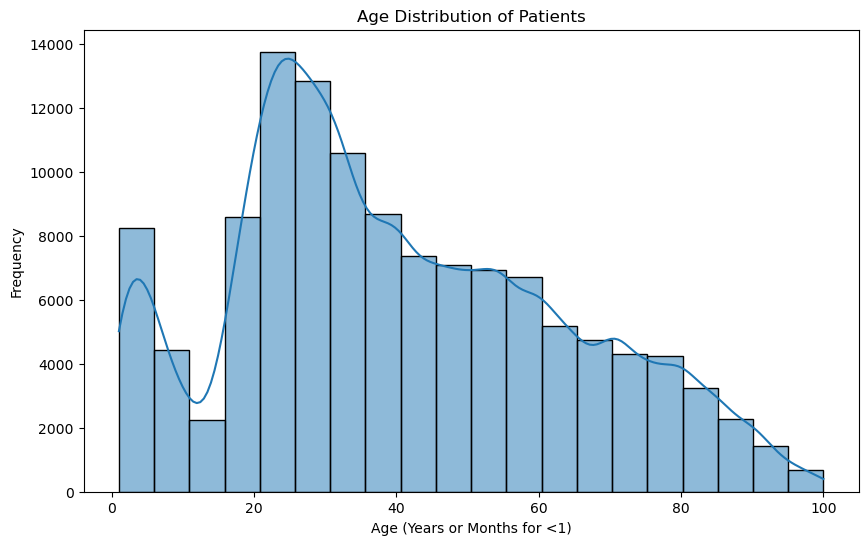

In [356]:
# Let's Handle Age outliers (e.g., Age > 100 or fractional ages)
df['Age'] = df['Age'].apply(lambda x: x * 12 if x < 1 else x)  # Convert fractional ages to months for infants
df.loc[df['Age'] > 100, 'Age'] = np.nan  # Cap extreme ages

# Patient Demographics
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, palette="Blues_r")
plt.title('Age Distribution of Patients')
plt.xlabel('Age (Years or Months for <1)')
plt.ylabel('Frequency')
plt.show()


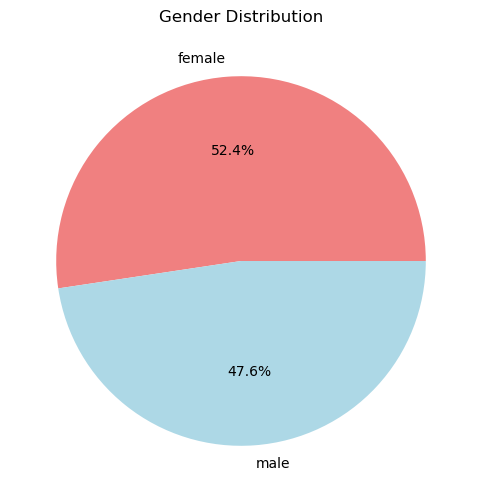

In [357]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution')
plt.show()

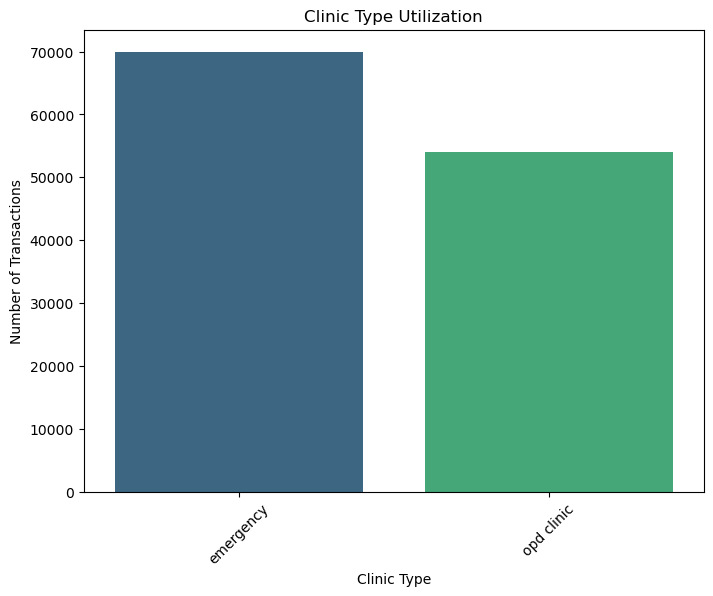

In [358]:
# Clinic Utilization
clinic_counts = df['Clinic_Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=clinic_counts.index, y=clinic_counts.values, palette='viridis')
plt.title('Clinic Type Utilization')
plt.xlabel('Clinic Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

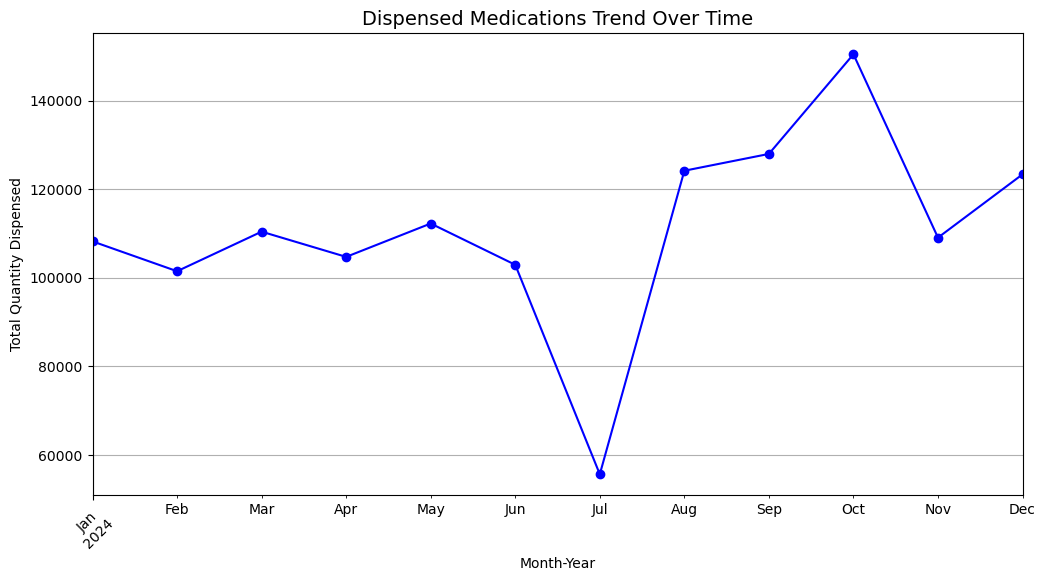

In [359]:

# Convert date to month-year for trend analysis
df["Month_Year"] = df["Date_Dispensed"].dt.to_period("M")

# Aggregate dispensed medications by month
monthly_trend = df.groupby("Month_Year")["Quantity"].sum()

# Plot dispensing trend over time
plt.figure(figsize=(12, 6))
monthly_trend.plot(marker="o", linestyle="-", color="b")
plt.title("Dispensed Medications Trend Over Time", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Total Quantity Dispensed")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


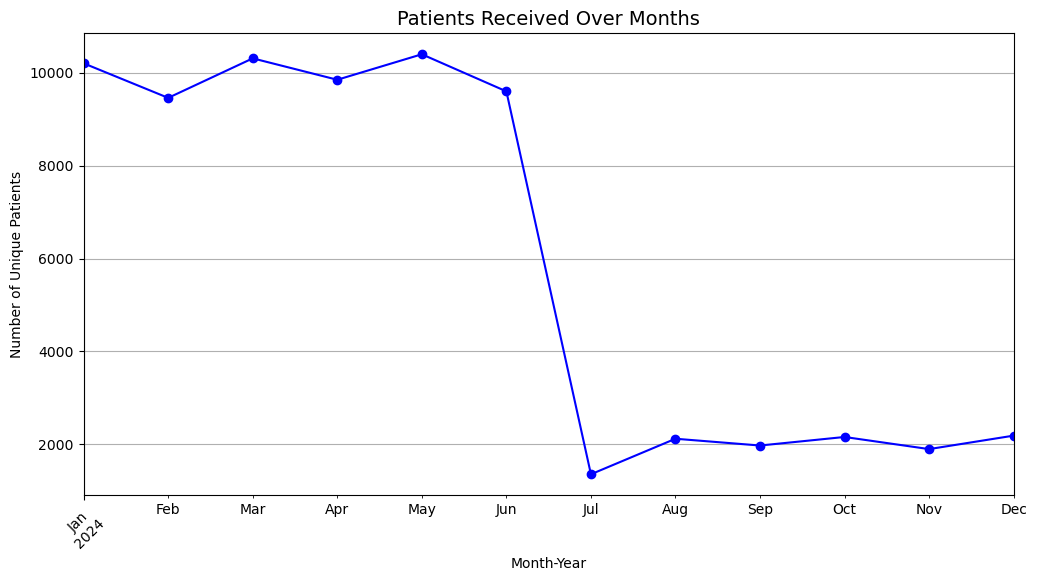

In [360]:
# Count unique patients per month
patients_trend = df.groupby("Month_Year")["Patient_Id"].nunique()

# Plot patients received over months
plt.figure(figsize=(12, 6))
patients_trend.plot(marker="o", linestyle="-", color="b")
plt.title("Patients Received Over Months", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Number of Unique Patients")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**We can observe that there was a significant** **decline in patient volume from July onward**

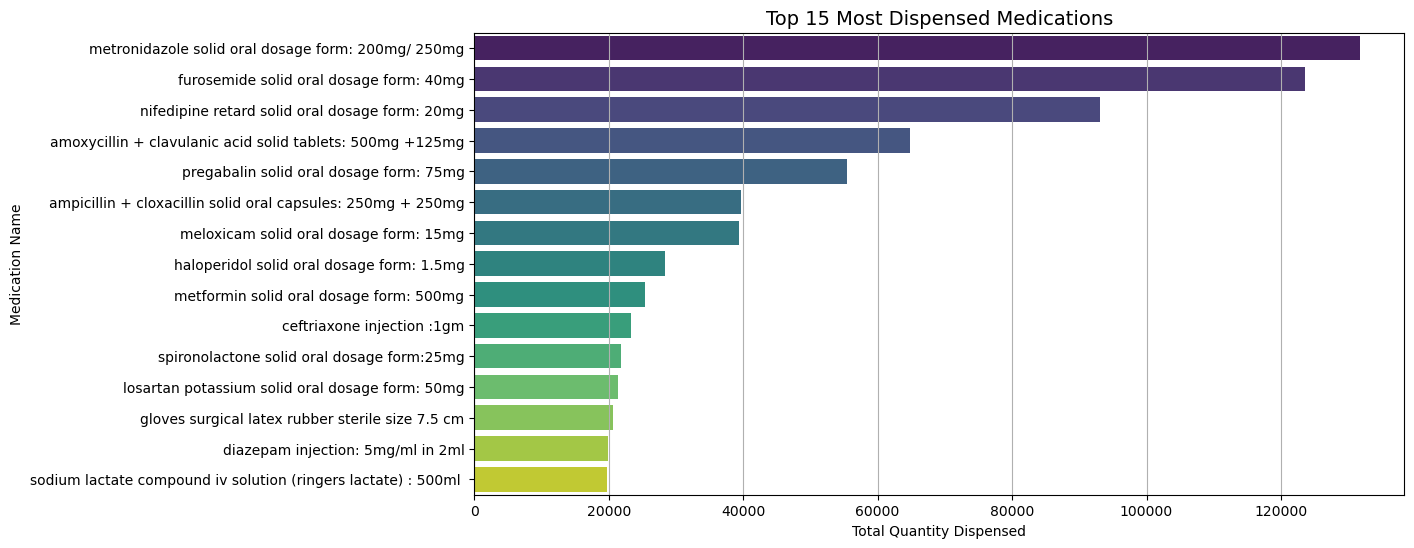

In [362]:
# Top 15 most dispensed medications
top_medications = df.groupby("Item_Name")["Quantity"].sum().nlargest(15)

# Plot the top dispensed medications
plt.figure(figsize=(12, 6))
sns.barplot(x=top_medications.values, y=top_medications.index, palette="viridis")
plt.title("Top 15 Most Dispensed Medications", fontsize=14)
plt.xlabel("Total Quantity Dispensed")
plt.ylabel("Medication Name")
plt.grid(axis="x")
plt.show()


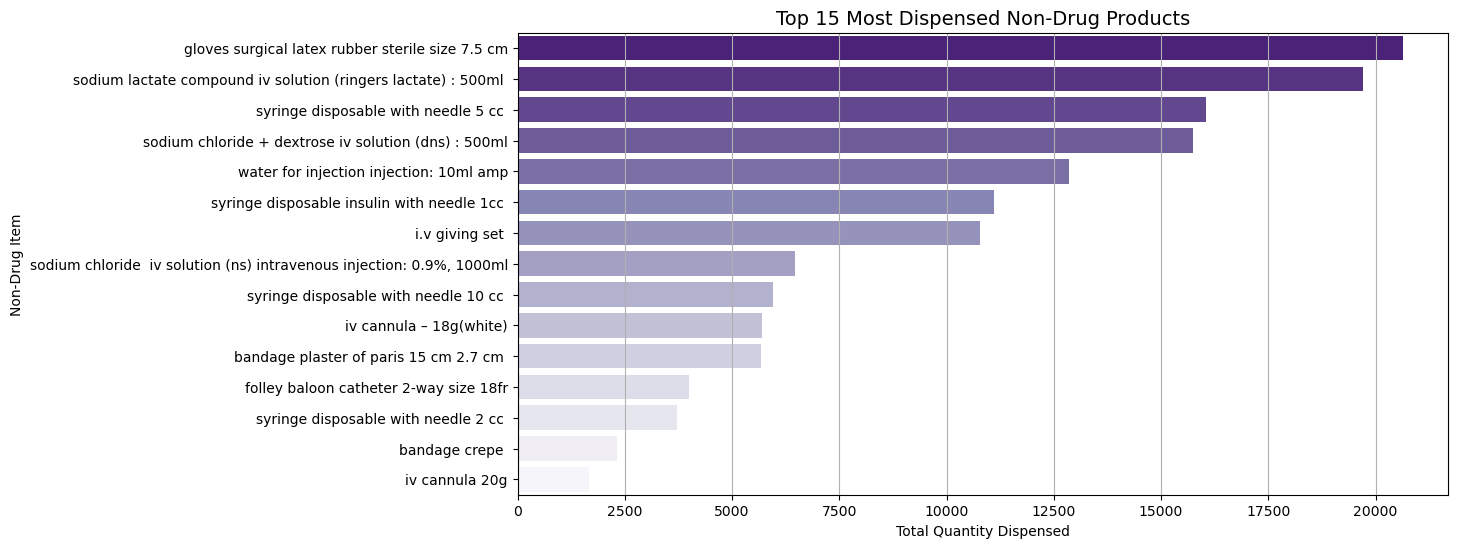

In [363]:

# Identify non-drug products based on keywords
non_drug_keywords = ["syringe", "bandage", "glove", "catheter", "mask", "dressing", "test strip", "needle", "solution","water", "iv", "disposable"]
df["is_non_drug"] = df["Item_Name"].apply(lambda x: any(keyword in x for keyword in non_drug_keywords))

# Separate non-drug items
non_drug_df = df[df["is_non_drug"]]

# Get top 15 most dispensed non-drug products
top_non_drug_items = non_drug_df.groupby("Item_Name")["Quantity"].sum().nlargest(15)

# Plot most dispensed non-drug products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_non_drug_items.values, y=top_non_drug_items.index, palette="Purples_r")
plt.title("Top 15 Most Dispensed Non-Drug Products", fontsize=14)
plt.xlabel("Total Quantity Dispensed")
plt.ylabel("Non-Drug Item")
plt.grid(axis="x")
plt.show()


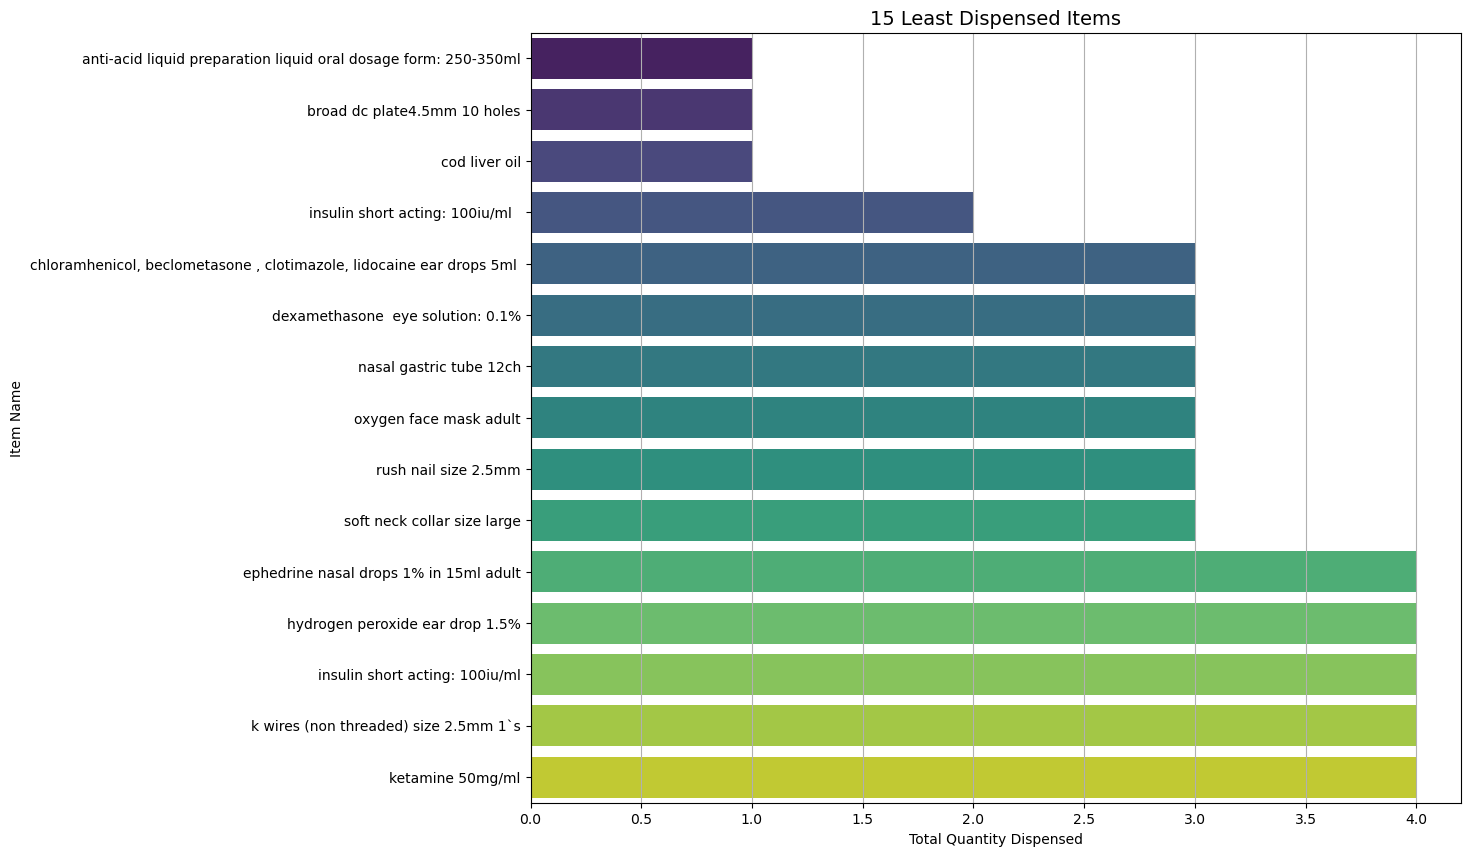

In [364]:
# Get the 15 least dispensed items (both drug and non-drug)
least_dispensed_items = df.groupby("Item_Name")["Quantity"].sum().nsmallest(15)

# Plot the least dispensed items
plt.figure(figsize=(12, 10))
sns.barplot(x=least_dispensed_items.values, y=least_dispensed_items.index, palette="viridis")
plt.title("15 Least Dispensed Items", fontsize=14)
plt.xlabel("Total Quantity Dispensed")
plt.ylabel("Item Name")
plt.grid(axis="x")
plt.show()


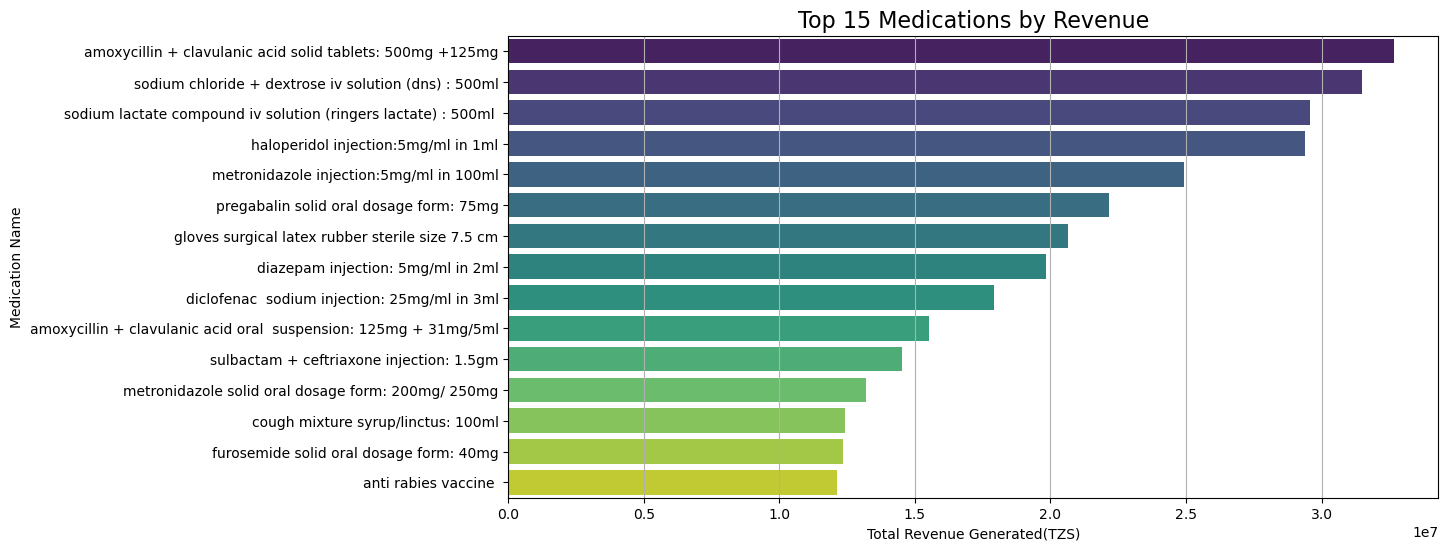

In [365]:
# Top 15 medications by total revenue (subtotal)
top_revenue_medications = df.groupby("Item_Name")["Subtotal"].sum().nlargest(15)

# Plot the revenue contribution of top medications
plt.figure(figsize=(12, 6))
sns.barplot(x=top_revenue_medications.values, y=top_revenue_medications.index, palette="viridis")
plt.title("Top 15 Medications by Revenue", fontsize=16)
plt.xlabel("Total Revenue Generated(TZS)")
plt.ylabel("Medication Name")
plt.grid(axis="x")
plt.show()


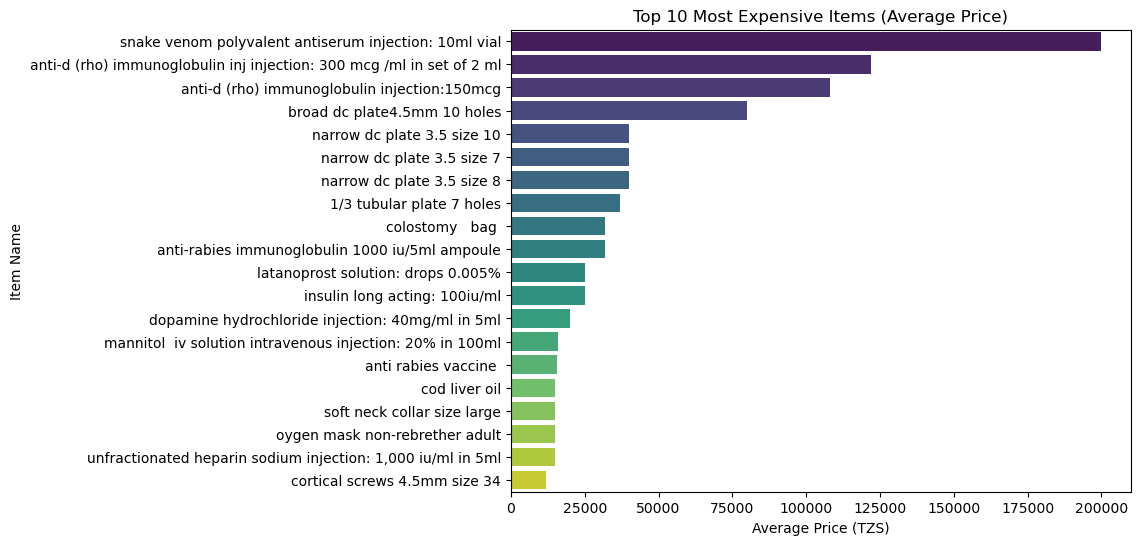

In [366]:
# Average price of top and least dispensed items (for comparison)
avg_price = df.groupby('Item_Name')['Price'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price.values, y=avg_price.index, palette='viridis')
plt.title('Top 10 Most Expensive Items (Average Price)')
plt.xlabel('Average Price (TZS)')
plt.ylabel('Item Name')
plt.show()

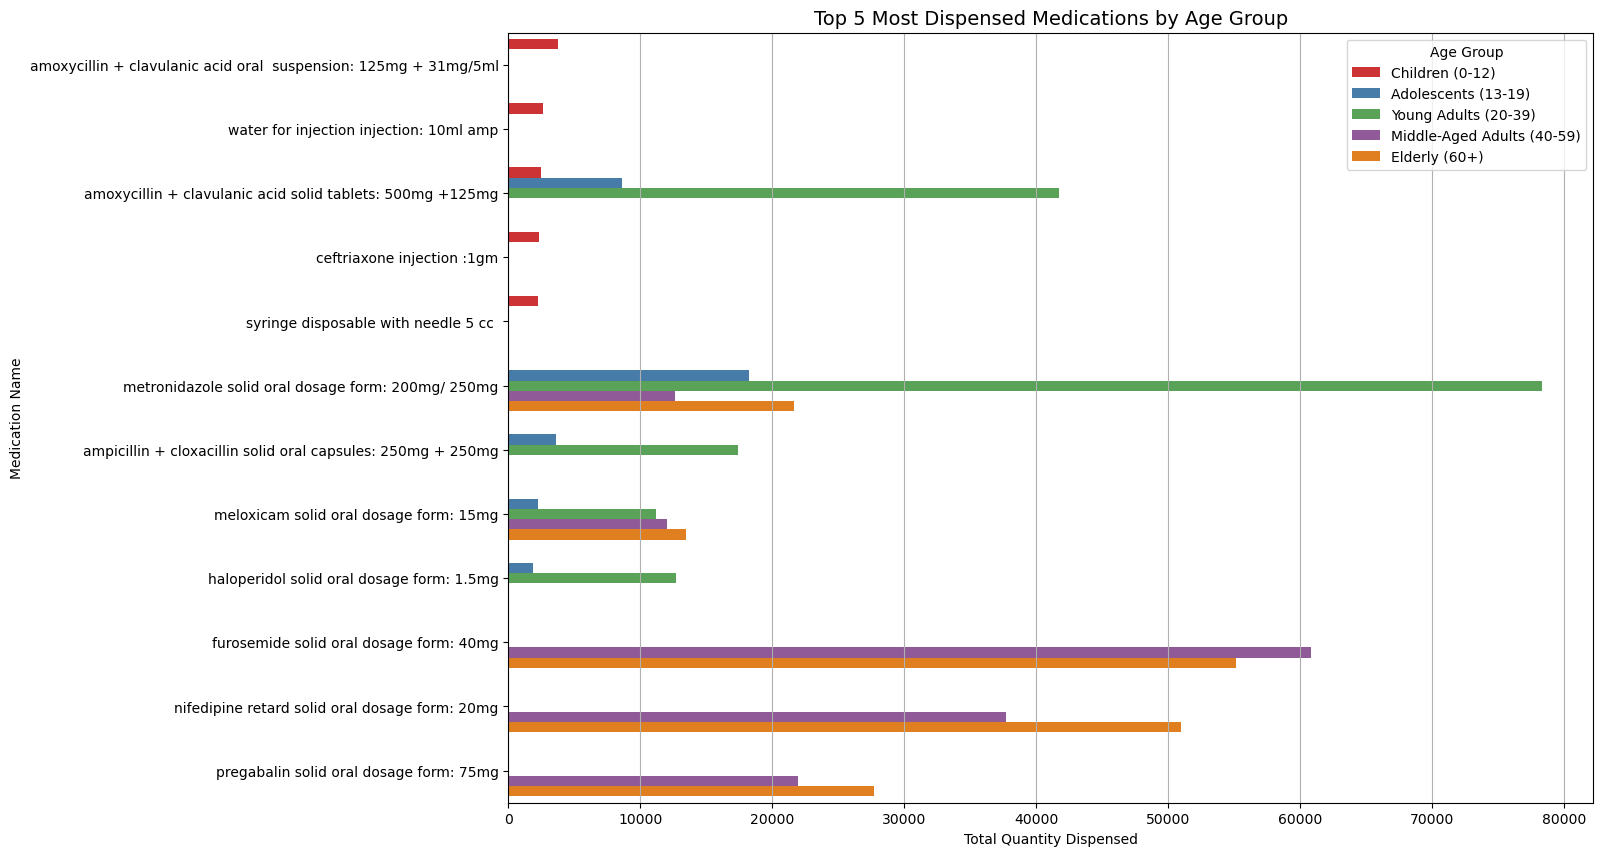

In [367]:
# Define age groups based on the 'age' column
age_bins = [0, 12, 19, 39, 59, 100]  # 100 as upper limit
age_labels = ["Children (0-12)", "Adolescents (13-19)", "Young Adults (20-39)", "Middle-Aged Adults (40-59)", "Elderly (60+)"]
df["age_group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=True)

# Aggregate most dispensed medications by age group
top_by_age_group = df.groupby(["age_group", "Item_Name"])["Quantity"].sum().reset_index()

# Get the top 5 medications for each age group
top_by_age_group = top_by_age_group.sort_values(["age_group", "Quantity"], ascending=[True, False])
top_5_by_age = top_by_age_group.groupby("age_group").head(5)

# Plot the top medications by age group
plt.figure(figsize=(14, 10))
sns.barplot(data=top_5_by_age, x="Quantity", y="Item_Name", hue="age_group", palette="Set1")
plt.title("Top 5 Most Dispensed Medications by Age Group", fontsize=14)
plt.xlabel("Total Quantity Dispensed")
plt.ylabel("Medication Name")
plt.legend(title="Age Group")
plt.grid(axis="x")
plt.show()


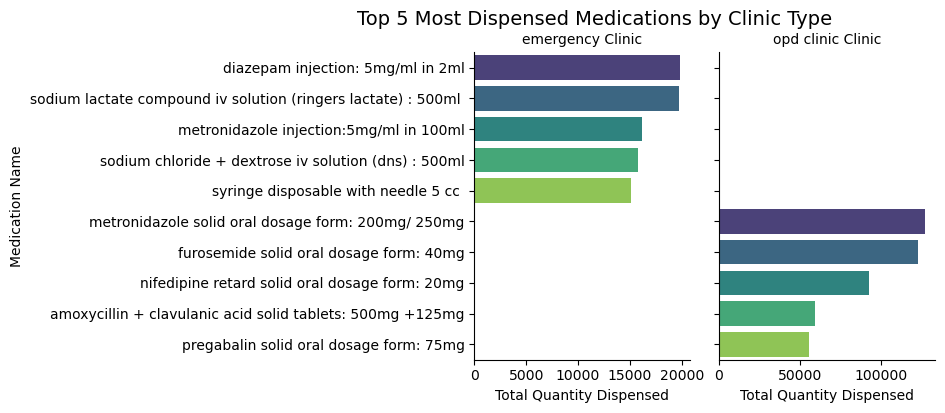

In [368]:
# Aggregate total quantity dispensed per clinic-type and medication
clinic_medication_usage = df.groupby(["Clinic_Type", "Item_Name"])["Quantity"].sum().reset_index()

# Selecting the top 5 most dispensed medications per clinic for better visualization
top_medications_per_clinic = clinic_medication_usage.groupby("Clinic_Type").apply(lambda x: x.nlargest(5, "Quantity")).reset_index(drop=True)

# Set up FacetGrid to visualize the distribution across clinics
g = sns.FacetGrid(top_medications_per_clinic, col="Clinic_Type", col_wrap=3, sharex=False, height=4)
g.map_dataframe(sns.barplot, x="Quantity", y="Item_Name", palette="viridis")

# Adjust plot aesthetics
g.set_axis_labels("Total Quantity Dispensed", "Medication Name")
g.set_titles(col_template="{col_name} Clinic")
plt.suptitle("Top 5 Most Dispensed Medications by Clinic Type", fontsize=14, y=1.02)
plt.show()


## **5.Key Findings from Exploratory Data Analysis**  

#### General Dispensing Trends   
- The number of **unique patients varies over time**, reflecting potential **seasonal healthcare demands**.  
- **Peaks in patient visits** may align with **seasonal illnesses, public health initiatives, or policy changes** affecting access to care.  
- The **decline in patient volume from July onward** is attributed to the **opening of specialized departments**, such as the **Orthopedic and Community Pharmacy Departments**.This expansion might have led to a **redistribution of patient load**,as individuals previously reliant on the existing pharmacy services began accessing care through these specialized units, thereby **reducing overall congestion.** 

#### Most Dispensed Medications  
- The **top dispensed medications** include common chronic disease treatments, antibiotics, and pain relievers.  
- Certain medications maintain high demand **across all age groups and clinics**, signifying their essential nature.  
- Specialized medications have a **clinic-specific demand**, suggesting targeted treatment protocols.  

#### Non-Drug Items Dispensed  
- **Medical supplies** such as syringes, gloves, test strips, and IV solutions form a significant portion of non-drug items.  
- These items are essential in **diagnostic and treatment procedures**, especially in Emergency situations.  
- The high demand suggests that **inventory management** for medical supplies is as critical as for medications.  

#### Least Dispensed Items  
- Some medications and supplies have **minimal dispensing volume**, indicating either:  
  - Low patient demand due to rare conditions.  
  - Availability of alternative medications.  
  - Potential stock management issues.  
- These items may require **re-evaluation of procurement strategies** or **re-distribution to other Pharmacy Departments** to avoid overstocking or wastage.  

#### Age Group Analysis  
- **Children (0-12 years)**: High demand for **antibiotics, cough syrups, and fever medications**.  
- **Adolescents (13-19 years)**: Increased dispensing of **pain relievers, antibiotics, and allergy drugs**.  
- **Young Adults (20-39 years)**: High usage of **antibiotics, anti-inflammatory drugs, and medications for Mental Health Cases**.
- **Middle-Aged Adults (40-59 years)**: Significant prescriptions for **hypertension, diabetes, and cholesterol management**.  
- **Elderly (60+ years)**: High dispensing of **chronic disease medications (e.g., cardiovascular drugs, arthritis treatments, and neurological medications)**.  

#### Drug Utilization by Clinic Type  
- Different **clinic types** exhibit unique prescribing patterns based on their specialization.  
- **OPD clinic** dispense a broad range of medications, while **Emergency clinics** focus on specific drugs(e.g, injections).  
- High-demand medications within a clinic suggest **the prevalence of certain conditions** within that patient group.  




## **6.Actionable Recommendations**  
✅ **Inventory Optimization**: Implement **predictive stock management** to prevent shortages of high-demand medications and reduce wastage of low-demand items.  
✅ **Seasonal Planning**: Anticipate **seasonal spikes** in patient visits and adjust medication stocks accordingly.  
✅ **Targeted Health Programs**: Design **age-group-specific healthcare interventions** to improve patient outcomes.  
✅ **Clinic-Specific Procurement**: Tailor medication stocking based on **clinic-level demand trends** for better resource allocation.  
✅ **Patient Adherence Monitoring**: Given the chronic disease burden in older adults, encourage **medication adherence programs** to improve long-term health outcomes.